# Titanic: Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC

from bayes_opt import BayesianOptimization

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

## 2. Data

### 2.1 Importing Data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Train Dataset")
print("Lines: {}".format(train.shape[0]))
print("Columns: {}".format(", ".join(train.columns)))

print("\n\nTest Dataset")
print("Lines: {}".format(test.shape[0]))
print("Columns: {}".format(", ".join(test.columns)))

Train Dataset
Lines: 891
Columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


Test Dataset
Lines: 418
Columns: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


### 2.2 Data Types

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The two dataset has the same data types.

### 2.3 Data Info

**Describe**

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Null Values**

In [9]:
(train.isna().sum() / train.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
(test.isna().sum() / test.shape[0]) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

#### Description
**PassengerId**  
Unique per passenger.

**Survived (Target)**  
If a passenger has survived or not.

**Pclass**  
Ordinal datatype for the ticket class, a proxy for socio-economic status.  
1 = upper class.  
2 = middle class.  
3 = lower class.

**Name**  
Passenger name. This variable is a nominal datatype. 
It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.

**Sex**  
If the passenger is male or female.

**Age**  
How old are the passengers. Perhaps childreen has a higher chance of survival.

**SibSp**  
Number of related siblings or spouse aboard.

**Parch**   
Number of related parents or children aboard. 

**Ticket**  
It's supposed to be unique per passenger. Perhaps we can use the ticket to fill some null values in others features.

**Fare**  
The price of the ticket. Like the pclass, we can use this feature for socio-economic relationships.
The test set has null values.

**Cabin**  
The cabin where the passenger were. 
The cabin is composed by a letter followed by a number sequence.
The letters represent the deck. Even though this column has the higher number of null values, we can extract the letter and see if there is some correlations.

**Embarked**  
The port where the passenger has embarked.
The train set has null values.

**Correlation**

Text(0.5, 1.05, 'Pearson Correlation of Train Dataset')

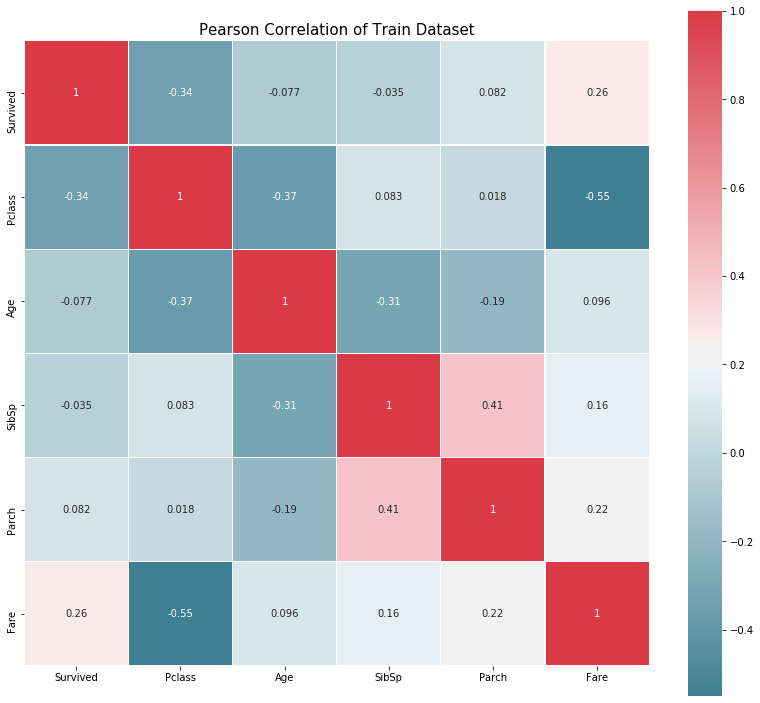

In [11]:
f, ax = plt.subplots(figsize = (14, 14))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr('pearson'), 
    cmap=colormap,
    square=True, 
    cbar_kws={'shrink': .9}, 
    ax=ax,
    annot=True, 
    linewidths=0.1, vmax=1.0, linecolor='white',
    annot_kws={'fontsize': 10}
)

plt.title('Pearson Correlation of Train Dataset', y=1.05, size=15)

Text(0.5, 1.05, 'Pearson Correlation of Test Dataset')

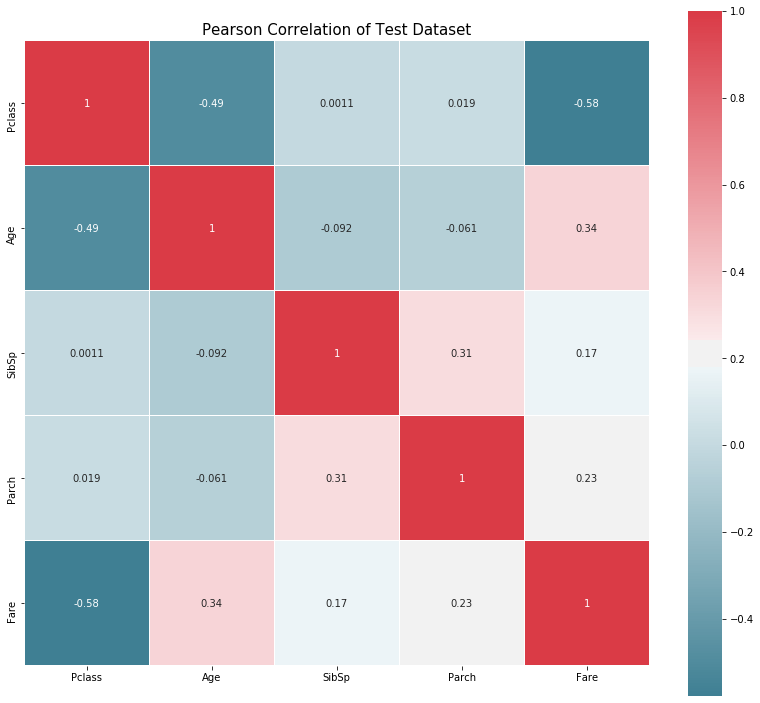

In [12]:
f, ax = plt.subplots(figsize = (14, 14))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr('pearson'), 
    cmap=colormap,
    square=True, 
    cbar_kws={'shrink': .9}, 
    ax=ax,
    annot=True, 
    linewidths=0.1, vmax=1.0, linecolor='white',
    annot_kws={'fontsize': 10}
)

plt.title('Pearson Correlation of Test Dataset', y=1.05, size=15)

## 3. Data Analysis and Feature Engineering

In [13]:
data = [train, test]

### 3.1 Passanger ID

The passenger ids are of no use for us, because is a unique value for each passenger.
We're not gonna drop from the test set because we need to submit the predictions.

In [14]:
train.drop('PassengerId', axis=1, inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 Ticket class

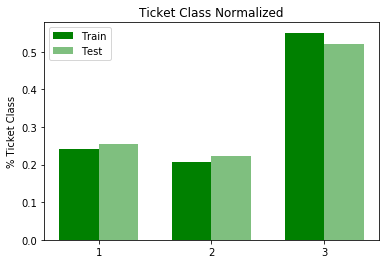

In [15]:
fig, ax = plt.subplots()

labels = ['1', '2', '3']

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, train.Pclass.value_counts().sort_index() / train.Pclass.count(), width, label='Train', color="green")
ax.bar(x + width/2, test.Pclass.value_counts().sort_index() / test.Pclass.count(), width, label='Test', color="green", alpha=0.5)

ax.set_ylabel('% Ticket Class')
ax.set_title('Ticket Class Normalized')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

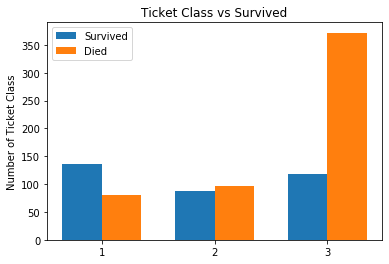

In [16]:
fig, ax = plt.subplots()

labels = ['1', '2', '3']

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, train[train.Survived == 1].Pclass.value_counts().sort_index(), width, label='Survived')
ax.bar(x + width/2, train[train.Survived == 0].Pclass.value_counts().sort_index(), width, label='Died')

ax.set_ylabel('Number of Ticket Class')
ax.set_title('Ticket Class vs Survived')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [17]:
le = LabelEncoder()
le.fit(train.Pclass)

for dataset in data:
    dataset.Pclass = le.transform(dataset.Pclass)

In [18]:
train.Pclass.value_counts()

2    491
0    216
1    184
Name: Pclass, dtype: int64

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.3 Name

In [20]:
train.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

The name of the passenger is not important to us. But we can derived the socio-economic status from the passenger's title.

In [21]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [22]:
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [23]:
pd.crosstab(test.Title, test.Sex)

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [24]:
titles = ["Master", "Miss", "Mr", "Royals", "Professionals"]

for dataset in data:
    dataset.Title = dataset.Title.replace(['Lady', 'the Countess', 'Countess', 'Don', 'Jonkheer', 'Dona', 'Sir'], 'Royals')
    dataset.Title = dataset.Title.replace(['Col', 'Dr', 'Major', 'Capt'], 'Professionals')
    dataset.Title = dataset.Title.replace(["Ms", "Mme", "Mlle", "Mrs"], 'Miss')
    dataset.Title = dataset.Title.replace(['Master', 'Rev'], 'Mas/Rev')
    dataset.Title = dataset.Title.map({"Mas/Rev": 0, "Miss": 1, "Mr": 2, "Royals": 3, "Professionals": 4})

In [25]:
train.Title.value_counts()

2    517
1    311
0     46
4     12
3      5
Name: Title, dtype: int64

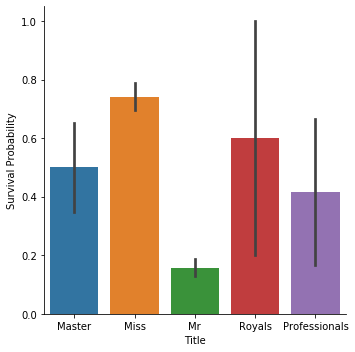

In [26]:
sns.factorplot(x="Title", y="Survived", data=train, kind="bar").set_xticklabels(titles).set_ylabels("Survival Probability")

In [27]:
for dataset in data:
    dataset.drop('Name', axis=1, inplace=True)

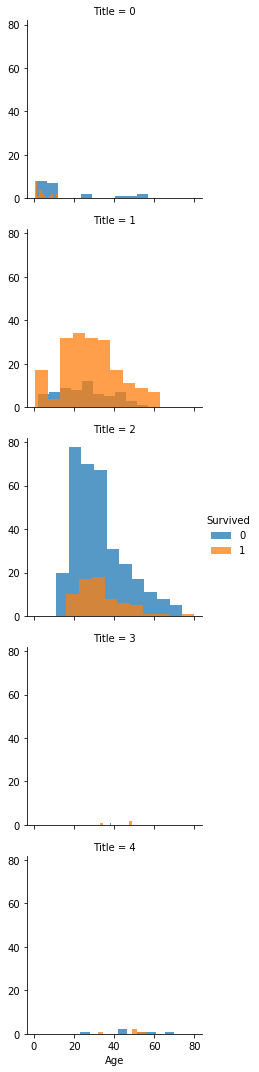

In [28]:
h = sns.FacetGrid(train, row="Title", hue="Survived")
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,2,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,0,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,0,female,35.0,1,0,113803,53.1000,C123,S,1
4,0,2,male,35.0,0,0,373450,8.0500,NaN,S,2


### 3.4 Sex

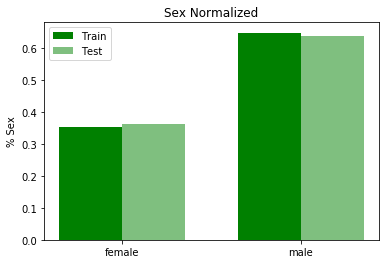

In [30]:
fig, ax = plt.subplots()

labels = ['female', 'male']

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, train.Sex.value_counts().sort_index() / train.Sex.count(), width, label='Train', color="green")
ax.bar(x + width/2, test.Sex.value_counts().sort_index() / test.Sex.count(), width, label='Test', color="green", alpha=0.5)

ax.set_ylabel('% Sex')
ax.set_title('Sex Normalized')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

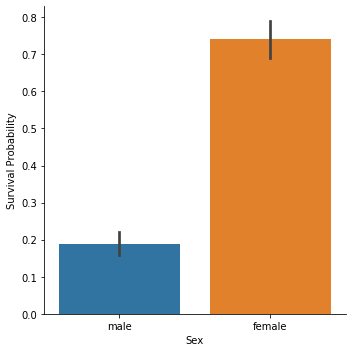

In [31]:
sns.factorplot(x="Sex", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

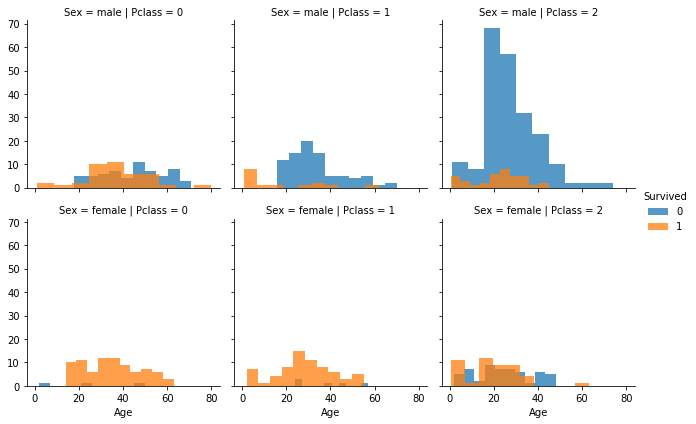

In [32]:
h = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

In [33]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})

In [34]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,2,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,0,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,2,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,0,0,35.0,1,0,113803,53.1000,C123,S,1
4,0,2,1,35.0,0,0,373450,8.0500,NaN,S,2


### 3.5 Age

In [35]:
train.Age.isna().sum() / train.shape[0]

0.19865319865319866

In [36]:
test.Age.isna().sum() / test.shape[0]

0.20574162679425836

The age has 19% of null values in the training set and 20% in the test set.

In [37]:
min(train.Age), max(train.Age)

(0.42, 80.0)

In [38]:
min(test.Age), max(test.Age)

(0.17, 76.0)

One approach is to fill the null values with the median per title.

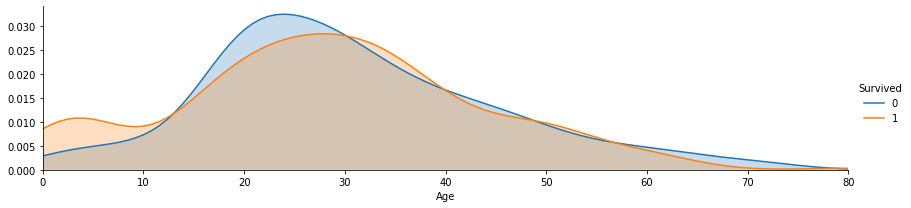

In [39]:
a = sns.FacetGrid(train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, train['Age'].max()))
a.add_legend()

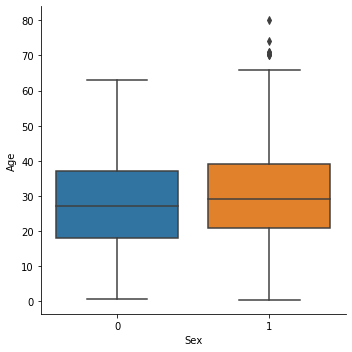

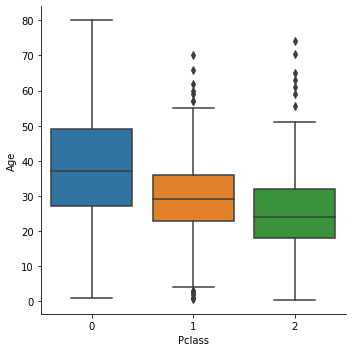

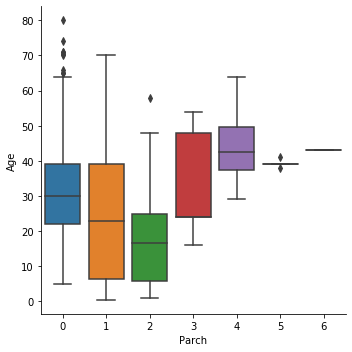

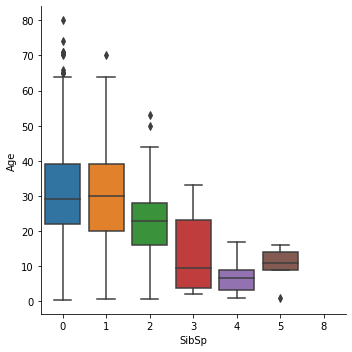

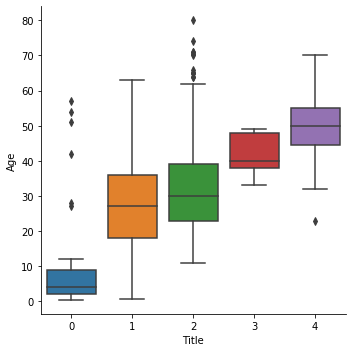

In [40]:
g = sns.factorplot(y="Age",x="Sex",data=train, kind="box")
g = sns.factorplot(y="Age",x="Pclass", data=train, kind="box")
g = sns.factorplot(y="Age",x="Parch", data=train, kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=train, kind="box")
g = sns.factorplot(y="Age",x="Title", data=train, kind="box")

In [41]:
train[train.Age.isna()].Title.value_counts()

2    119
1     53
0      4
4      1
Name: Title, dtype: int64

In [42]:
def fill_age_missing_values(df):
    age_null = list(df[df["Age"].isnull()].index)

    for index in age_null:
        temp_Pclass = df.iloc[index]["Pclass"]
        temp_SibSp = df.iloc[index]["SibSp"]
        temp_Parch = df.iloc[index]["Parch"]
        temp_Title = df.iloc[index]["Title"]
        
        age_median = df["Age"][(
            (df["Pclass"] == temp_Pclass) & 
            (df["Pclass"] == temp_Pclass) & 
            (df["SibSp"] == temp_SibSp) & 
            (df["Parch"] == temp_Parch) & 
            (df["Title"] == temp_Title)
        )].median()
        
        df["Age"].iloc[index] = age_median if (df.iloc[index]["Age"] == True) and (np.isnan(age_median) == False) else df["Age"].median()
    return df

In [43]:
for dataset in data:
    dataset = fill_age_missing_values(dataset)

In [44]:
train.Age.isna().sum(), test.Age.isna().sum()

(0, 0)

In [45]:
train[train.Age < 1].Survived.mean()

1.0

All the babies has survived.

In [46]:
age_groups = ['Baby',  'Child', 'Young Adult', 'Adult', 'Senior']

for dataset in data:
    dataset.loc[(dataset['Age'] <= 2), 'Age Group'] = 0
    dataset.loc[((dataset["Age"] > 2) & (dataset['Age'] <= 10)), 'Age Group'] = 1 
    dataset.loc[((dataset["Age"] > 10) & (dataset['Age'] <= 19)), 'Age Group'] = 2
    dataset.loc[((dataset["Age"] > 19) & (dataset['Age'] <= 60)), 'Age Group'] = 3
    dataset.loc[(dataset["Age"] > 60), 'Age Group'] = 4
    
    dataset["Age"] = dataset["Age"].astype(int)
    dataset["Age Group"] = dataset["Age Group"].astype(int)

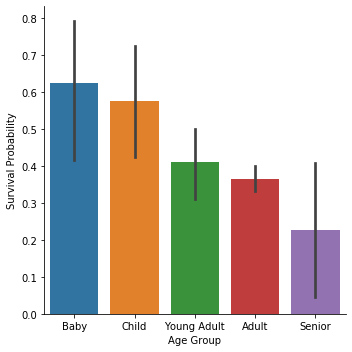

In [47]:
sns.factorplot(x="Age Group", y="Survived", data=train, kind="bar").set_xticklabels(age_groups).set_ylabels("Survival Probability")

In [48]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group
0,0,2,1,22,1,0,A/5 21171,7.2500,NaN,S,2,3
1,1,0,0,38,1,0,PC 17599,71.2833,C85,C,1,3
2,1,2,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3
3,1,0,0,35,1,0,113803,53.1000,C123,S,1,3
4,0,2,1,35,0,0,373450,8.0500,NaN,S,2,3


### 3.6 Family Size

#### Siblings and spouses aboard.

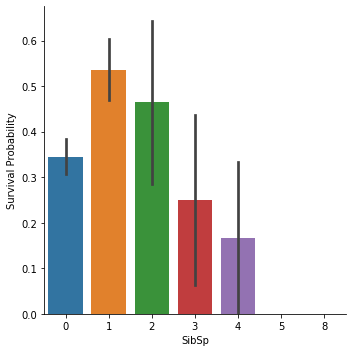

In [49]:
sns.factorplot(x="SibSp", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

In [50]:
train[train.SibSp > 4].Survived.mean()

0.0

In [51]:
train[train.SibSp > 4]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group
59,0,2,1,11,5,2,CA 2144,46.90,NaN,S,0,2
71,0,2,0,16,5,2,CA 2144,46.90,NaN,S,1,2
159,0,2,1,28,8,2,CA. 2343,69.55,NaN,S,0,3
180,0,2,0,28,8,2,CA. 2343,69.55,NaN,S,1,3
201,0,2,1,28,8,2,CA. 2343,69.55,NaN,S,2,3
324,0,2,1,28,8,2,CA. 2343,69.55,NaN,S,2,3
386,0,2,1,1,5,2,CA 2144,46.90,NaN,S,0,0
480,0,2,1,9,5,2,CA 2144,46.90,NaN,S,0,1
683,0,2,1,14,5,2,CA 2144,46.90,NaN,S,2,2
792,0,2,0,28,8,2,CA. 2343,69.55,NaN,S,1,3


Nobody with more than 4 number of sibling and/or spouses aboard has survided

#### Parents and childreen aboard

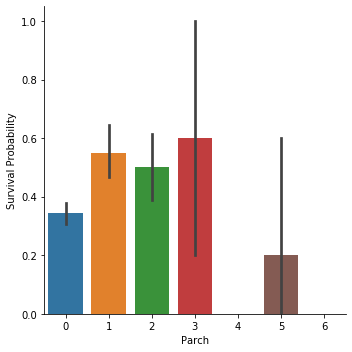

In [52]:
sns.factorplot(x="Parch", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

In [53]:
train[train.Parch > 5].Survived.mean()

0.0

In [54]:
train[train.Parch > 5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group
678,0,2,0,43,1,6,CA 2144,46.9,NaN,S,1,3


Nobody with more than 5 parents aboard has survived, but we only have one observation, so we can't conclude anything.

#### Creating Family Size

In [55]:
for dataset in data:
    dataset['Family'] = dataset.SibSp + dataset.Parch

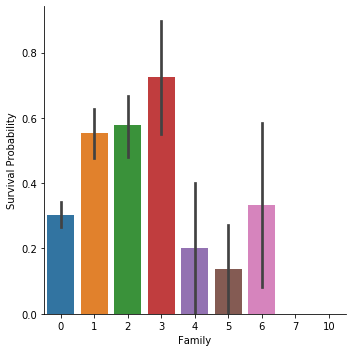

In [56]:
sns.factorplot(x="Family", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

We can see a drop in the survival rate for passenger alone in the ship.

In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
0,0,2,1,22,1,0,A/5 21171,7.2500,NaN,S,2,3,1
1,1,0,0,38,1,0,PC 17599,71.2833,C85,C,1,3,1
2,1,2,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,0
3,1,0,0,35,1,0,113803,53.1000,C123,S,1,3,1
4,0,2,1,35,0,0,373450,8.0500,NaN,S,2,3,0


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
0,892,2,1,34,0,0,330911,7.8292,NaN,Q,2,3,0
1,893,2,0,47,1,0,363272,7.0000,NaN,S,1,3,1
2,894,1,1,62,0,0,240276,9.6875,NaN,Q,2,4,0
3,895,2,1,27,0,0,315154,8.6625,NaN,S,2,3,0
4,896,2,0,22,1,1,3101298,12.2875,NaN,S,1,3,2


### 3.7 Passenger Fare

In [59]:
test.Fare.isna().sum()

1

The test set has 1 row with null Fare.

In [60]:
test[test.Fare.isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
152,1044,2,1,60,0,0,3701,NaN,NaN,S,2,4,0


Let's fill this null value with the mean of 3rd class tickets.

In [61]:
test.loc[test.Fare.isna(), 'Fare'] = test[test.Pclass == 3].Fare.mean()

#### Fare distribution

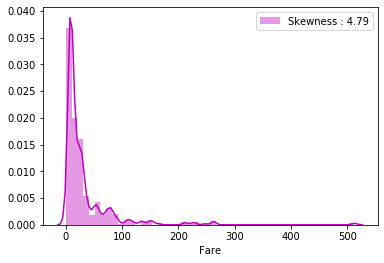

In [62]:
sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew())).legend(loc="best")

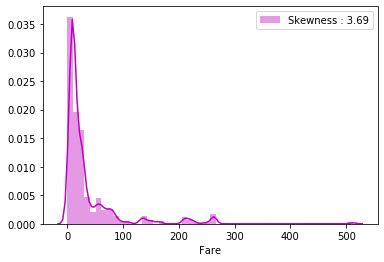

In [63]:
sns.distplot(test["Fare"], color="m", label="Skewness : %.2f"%(test["Fare"].skew())).legend(loc="best")

The Fare is highly skewed, let's apply a log function to tackle reduce the skewness.

In [64]:
min(train.Fare), min(test.Fare)

(0.0, 0.0)

In [65]:
for dataset in data:
    dataset["Fare"] = dataset["Fare"].map(lambda x: np.log(x) if x > 0 else 0)

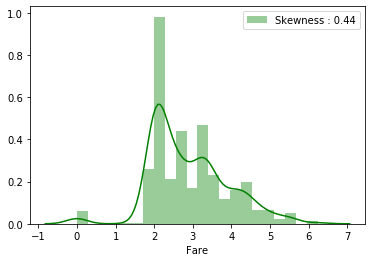

In [66]:
sns.distplot(train["Fare"], color="g", label="Skewness : %.2f"%(train["Fare"].skew())).legend(loc="best")

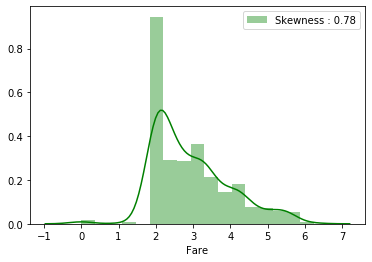

In [67]:
sns.distplot(test["Fare"], color="g", label="Skewness : %.2f"%(test["Fare"].skew())).legend(loc="best")

Split the Fare in four groups

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
0,0,2,1,22,1,0,A/5 21171,1.981001,NaN,S,2,3,1
1,1,0,0,38,1,0,PC 17599,4.266662,C85,C,1,3,1
2,1,2,0,26,0,0,STON/O2. 3101282,2.070022,NaN,S,1,3,0
3,1,0,0,35,1,0,113803,3.972177,C123,S,1,3,1
4,0,2,1,35,0,0,373450,2.085672,NaN,S,2,3,0


### 3.8 Cabin

In [69]:
train.Cabin.isna().sum() / train.shape[0]

0.7710437710437711

These null values can mean two things:
1. Problem with the data, lost fields.
2. Not everyone got a seperated cabin, thus the cabins that got registreds belong to higher socio economic class.

Let's investigate the second assumption by correlation the cabin with the pclass.

In [70]:
for dataset in data:
    dataset.Cabin.fillna("U", inplace=True)
    dataset.Cabin = dataset.Cabin.apply(lambda x: x.split(" ")[-1][0] if len(x) > 0 else "U")

In [71]:
train.Cabin.value_counts()

U    687
C     59
B     47
E     33
D     33
A     15
F      9
G      7
T      1
Name: Cabin, dtype: int64

In [72]:
test.Cabin.value_counts()

U    327
C     35
B     18
D     13
E     11
A      7
F      5
G      2
Name: Cabin, dtype: int64

The distributions of cabin id seems to be the same among the both datasets

In [73]:
print("Survival rate (%)")
print("With Cabin: {:.2f}".format(train[train.Cabin != "U"].Survived.sum() / train[train.Cabin != "U"].shape[0]))
print("Without Cabin: {:.2f}".format(train[train.Cabin == "U"].Survived.sum() / train[train.Cabin == "U"].shape[0]))

Survival rate (%)
With Cabin: 0.67
Without Cabin: 0.30


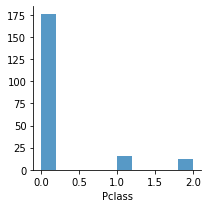

In [74]:
h = sns.FacetGrid(train[train.Cabin != "U"])
h.map(plt.hist, "Pclass", alpha=0.75)

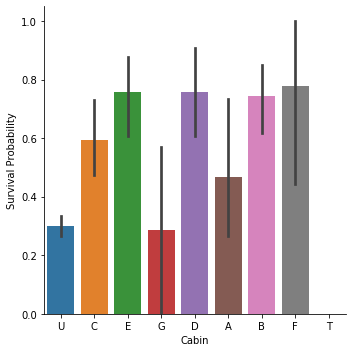

In [75]:
sns.factorplot(x="Cabin", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

In [76]:
for dataset in data:
    dataset.Cabin = dataset.Cabin.map({'U': 0, 'T': 0, 'G': 1, 'A': 2, 'C': 3, 'B': 4, 'D': 5, 'E': 6, 'F': 7})

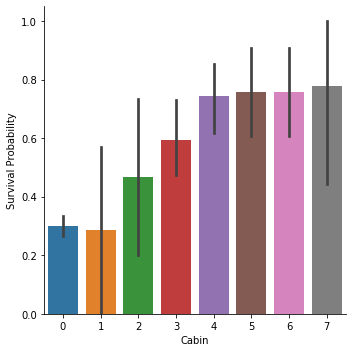

In [77]:
sns.factorplot(x="Cabin", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

In [78]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
0,0,2,1,22,1,0,A/5 21171,1.981001,0,S,2,3,1
1,1,0,0,38,1,0,PC 17599,4.266662,3,C,1,3,1
2,1,2,0,26,0,0,STON/O2. 3101282,2.070022,0,S,1,3,0
3,1,0,0,35,1,0,113803,3.972177,3,S,1,3,1
4,0,2,1,35,0,0,373450,2.085672,0,S,2,3,0


### 3.9 Embarked

In [79]:
train.Embarked.isna().sum()

2

In [80]:
train[train.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
61,1,0,0,38,0,0,113572,4.382027,4,NaN,1,3,0
829,1,0,0,62,0,0,113572,4.382027,4,NaN,1,4,0


In [81]:
train.loc[train.Embarked.isna(), 'Embarked'] = train.Embarked.mode()[0]

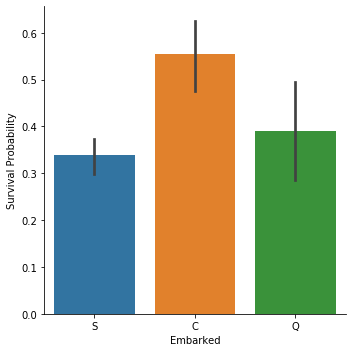

In [82]:
sns.factorplot(x="Embarked", y="Survived", data=train, kind="bar").set_ylabels("Survival Probability")

Passengers that embarked from Cherbourg(C), have the highest survival rate at almost 55%.  
Passengers that embarked from Queenstown(Q), have a 40% survical rate.  
Passengers that embarked from Southampton(S), have the lowest survival rate at just over 30%.  

Let's check the correlation between the Pclass and the Embarked

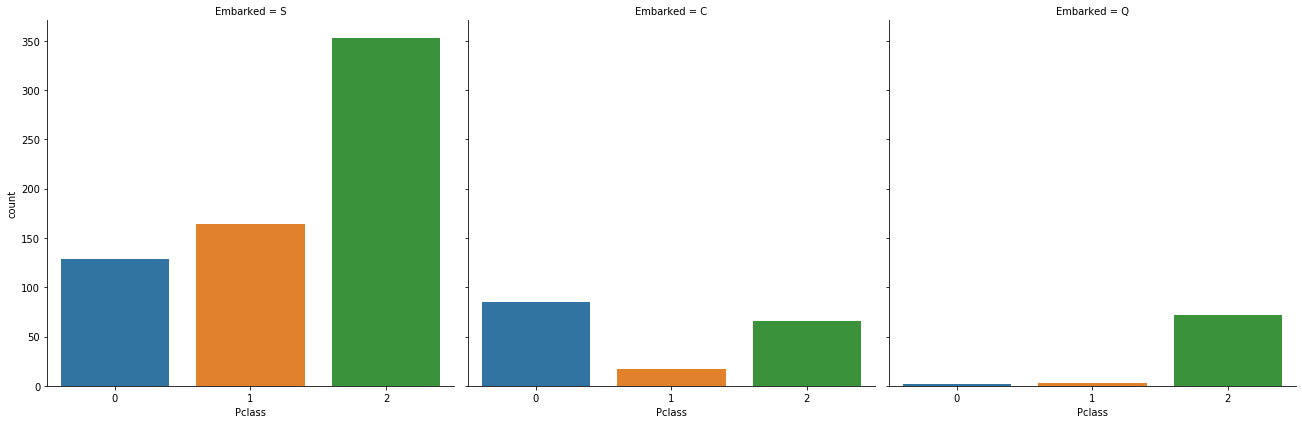

In [83]:
sns.factorplot("Pclass", col="Embarked",  data=train, size=6, kind="count")

Queenstown(Q) has almost exclusively Pclass = 3 passengers  
Southampton(S) has a majority of Pclass = 3 passengers  
Cherbourg(C) has a majority of Pclass = 1 passengers  

In [84]:
for dataset in data:
    dataset.Embarked = dataset.Embarked.map({"C": 2, "Q": 1, "S": 0})

In [85]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Group,Family
0,0,2,1,22,1,0,A/5 21171,1.981001,0,0,2,3,1
1,1,0,0,38,1,0,PC 17599,4.266662,3,2,1,3,1
2,1,2,0,26,0,0,STON/O2. 3101282,2.070022,0,0,1,3,0
3,1,0,0,35,1,0,113803,3.972177,3,0,1,3,1
4,0,2,1,35,0,0,373450,2.085672,0,0,2,3,0


### 3.10 Removing non-essential features

In [86]:
for dataset in data:
    dataset.drop(columns=['Parch', 'SibSp', 'Ticket', 'Age'], inplace=True)

In [87]:
train.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,Age Group,Family
0,0,2,1,1.981001,0,0,2,3,1
1,1,0,0,4.266662,3,2,1,3,1
2,1,2,0,2.070022,0,0,1,3,0
3,1,0,0,3.972177,3,0,1,3,1
4,0,2,1,2.085672,0,0,2,3,0


## 4. Target

In [88]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [89]:
train.Survived.mean()

0.3838383838383838

## 5. Final Features

#### Correlations

Text(0.5, 1.05, 'Pearson Correlation of Features')

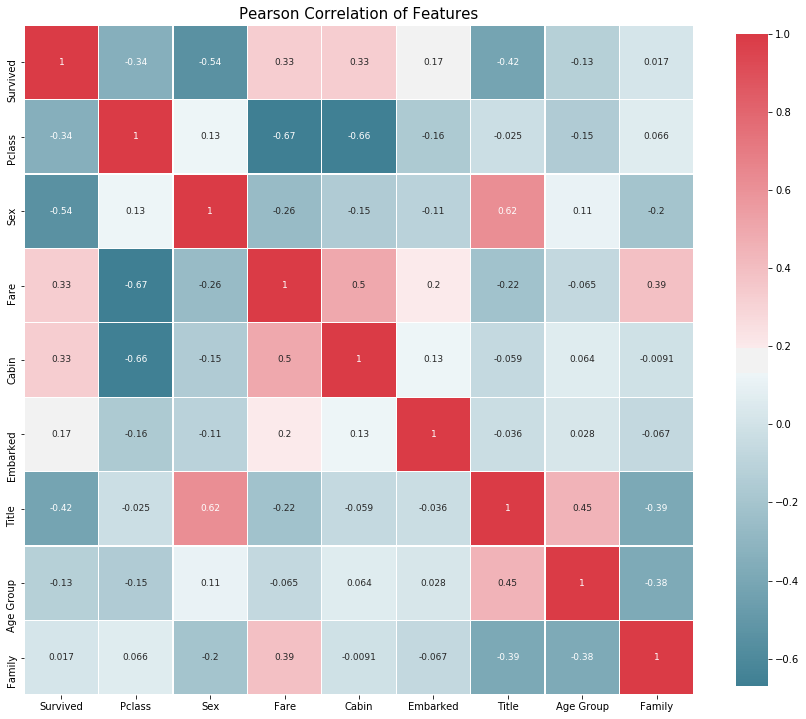

In [90]:
f, ax = plt.subplots(figsize = (15, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    train.corr('pearson'), 
    cmap=colormap,
    square=True, 
    cbar_kws={'shrink': .8}, 
    ax=ax,
    annot=True, 
    linewidths=0.1, vmax=1.0, linecolor='white',
    annot_kws={'fontsize': 9}
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### One Hot Encoding

In [91]:
train = pd.get_dummies(train, columns = ["Title"])
train = pd.get_dummies(train, columns = ["Embarked"])
train = pd.get_dummies(train, columns = ["Pclass"])
train = pd.get_dummies(train, columns = ["Age Group"])

In [92]:
train.head()

,Survived,Sex,Fare,Cabin,Family,Title_0,Title_1,Title_2,Title_3,Title_4,...,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2,Age Group_0,Age Group_1,Age Group_2,Age Group_3,Age Group_4
0,0,1,1.981001,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,4.266662,3,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,1,0,2.070022,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,3.972177,3,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,2.085672,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [93]:
test = pd.get_dummies(test, columns = ["Title"])
test = pd.get_dummies(test, columns = ["Embarked"])
test = pd.get_dummies(test, columns = ["Pclass"])
test = pd.get_dummies(test, columns = ["Age Group"])

In [94]:
test.head()

,PassengerId,Sex,Fare,Cabin,Family,Title_0,Title_1,Title_2,Title_3,Title_4,...,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2,Age Group_0,Age Group_1,Age Group_2,Age Group_3,Age Group_4
0,892,1,2.057860,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,893,0,1.945910,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,894,1,2.270836,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,895,1,2.159003,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,896,0,2.508582,0,2,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Defining Final Features

In [95]:
preds = list(train.columns)
preds.remove('Survived')
preds.remove('Cabin')
preds

['Sex',
 'Fare',
 'Family',
 'Title_0',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Pclass_0',
 'Pclass_1',
 'Pclass_2',
 'Age Group_0',
 'Age Group_1',
 'Age Group_2',
 'Age Group_3',
 'Age Group_4']

In [96]:
X_train = train[preds]
y_train = train.Survived

X_test = test[preds]

#### Scaling

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# X_train_scaled = X_train
# X_test_scaled = X_test

#### Importances

In [98]:
importances = []
for i in range(10):
    rf = RandomForestClassifier()
    rf.fit(X_train_scaled, y_train)
    if len(importances) > 0:
        importances = [x + y for x, y in zip(importances, rf.feature_importances_)]
    else:
        importances = rf.feature_importances_

importances = [x / 10 for x in importances]

In [99]:
importances = pd.DataFrame({'feature': preds, 'importance':importances})
importances

,feature,importance
0,Sex,0.125493
1,Fare,0.340785
2,Family,0.097967
3,Title_0,0.011229
4,Title_1,0.092295
5,Title_2,0.134009
6,Title_3,0.001554
7,Title_4,0.003878
8,Embarked_0,0.014470
9,Embarked_1,0.008467


In [100]:
importances.sort_values('importance', ascending=False, inplace=True)

In [101]:
acc = []
for i in importances.importance.values:
    acc.append(i + acc[-1] if len(acc) > 0 else i)
importances['acc'] = acc
importances

,feature,importance,acc
1,Fare,0.340785,0.340785
5,Title_2,0.134009,0.474795
0,Sex,0.125493,0.600287
2,Family,0.097967,0.698254
4,Title_1,0.092295,0.790549
13,Pclass_2,0.056282,0.846831
11,Pclass_0,0.031750,0.878581
12,Pclass_1,0.019451,0.898032
17,Age Group_3,0.017694,0.915726
8,Embarked_0,0.014470,0.930196


In [102]:
importances.set_index('feature', drop=True, inplace=True)

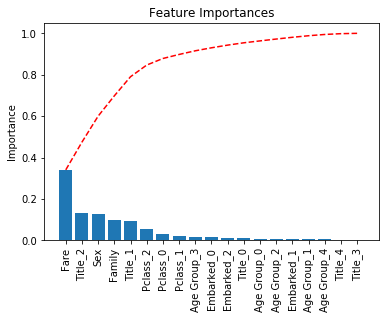

In [103]:
fig, ax = plt.subplots()

ax.bar(importances.index, importances.importance)
ax.plot(importances.index, importances.acc, '--', color="red")
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
plt.xticks(rotation=90)

plt.show()

## 6. Modelling

### 6.1 Model Exploration

In [105]:
MODELS = [
    #Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    
    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),
    
    #Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    
    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    #xgboost
    XGBClassifier()    
]

k_fold = StratifiedKFold(n_splits=5)

columns = ['Model Name', 'Parameters','Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy STD * 3', 'Model', 'Time']
models = pd.DataFrame(columns=columns)

row_index = 0
for ml in MODELS:
    model_name = ml.__class__.__name__
    models.loc[row_index, 'Model Name'] = model_name
    models.loc[row_index, 'Parameters'] = str(ml.get_params())
    
    cv_results = cross_validate(ml, X_train_scaled, y_train, n_jobs=4, cv=k_fold, return_train_score=True, return_estimator=True)

    models.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    models.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    models.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    models.loc[row_index, 'Test Accuracy STD * 3'] = cv_results['test_score'].std() * 3
    models.loc[row_index, 'Model'] = cv_results['estimator']
    
    row_index+=1

models.sort_values(by=['Test Accuracy Mean'], ascending=False, inplace=True)
models.reset_index(drop=True, inplace=True)
models

,Model Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy STD * 3,Model,Time
0,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.931537,0.82718,0.0958197,"(XGBClassifier(base_score=0.5, booster=None, c...",0.128389
1,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.897305,0.824914,0.0726454,"(([DecisionTreeRegressor(ccp_alpha=0.0, criter...",0.174155
2,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.929853,0.823803,0.0567241,"((DecisionTreeClassifier(ccp_alpha=0.0, class_...",0.0343561
3,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.8454,0.817055,0.0380168,"(SVC(C=1.0, break_ties=False, cache_size=200, ...",0.117707
4,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.938551,0.813709,0.0681308,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.0039721
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.819024,0.813709,0.0572568,"(LinearSVC(C=1.0, class_weight=None, dual=True...",0.0712363
6,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.817901,0.809215,0.0506897,"(LinearDiscriminantAnalysis(n_components=None,...",0.00690155
7,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.818744,0.809215,0.0506897,"(RidgeClassifierCV(alphas=array([ 0.1, 1. , 1...",0.00555611
8,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.835298,0.809215,0.0378579,"(NuSVC(break_ties=False, cache_size=200, class...",0.13578
9,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.818464,0.805857,0.0620593,"(LogisticRegressionCV(Cs=10, class_weight=None...",0.300688


Text(0, 0.5, 'Algorithm')

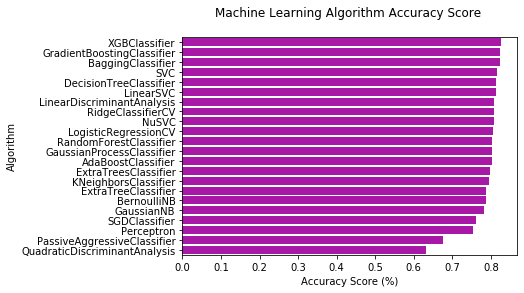

In [107]:
sns.barplot(x='Test Accuracy Mean', y='Model Name', data=models, color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Getting predictions for the 5 best models.

In [113]:
# 77% accuracy
top_k_models = 5

y_test = []
for i in range(top_k_models):
    preds = []
    for ml in models.loc[i, 'Model']:
        preds = [x + y for x, y in zip(ml.predict(X_test_scaled), preds)] if len(preds) > 0 else ml.predict(X_test_scaled)
    
    preds = [x/len(models.loc[i, 'Model']) for x in preds]
    y_test = [x + y for x, y in zip(preds, y_test)] if len(y_test) > 0 else preds

y_test = [x/top_k_models for x in y_test]
y_test = [1 if x >= .5 else 0 for x in y_test]

test['Survived'] = y_test
print('Survival rate: {}'.format(test['Survived'].mean()))

test[['PassengerId', 'Survived']].to_csv('submission.csv', index=None)

Survival rate: 0.361244019138756


### 6.2 Hyper Parameter Tunning

#### Gradient Boosting

In [125]:
gbc = GradientBoostingClassifier()

param_grid = {
    "max_depth": [1, 3, 5, 7, None],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "n_estimators" :[100, 200, 300]
}

gridcv = GridSearchCV(gbc, param_grid = param_grid, cv=k_fold, scoring="accuracy", n_jobs=4, verbose=1)

gridcv.fit(X_train, y_train)

gbc_best = gridcv.best_estimator_

# Best Accuracy Score
gridcv.best_score_

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done 654 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 675 out of 675 | elapsed:  1.6min finished


0.8428786642395331

77,03% of accuracy in Kaggle test set.

#### XGBoost

In [131]:
xgb = XGBClassifier()

param_grid = {
    "max_depth": [1, 3, 5, 7, None],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "n_estimators" :[100, 200, 300]
}

gridcv = GridSearchCV(xgb, param_grid = param_grid, cv=k_fold, scoring="accuracy", n_jobs=4, verbose=1)

gridcv.fit(X_train, y_train)

xgb_best = gridcv.best_estimator_

# Best Accuracy Score
gridcv.best_score_

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done 668 out of 675 | elapsed:   35.8s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 675 out of 675 | elapsed:   36.3s finished


0.8372920720607618

77,51% of accuracy in Kaggle test set.

#### Random Forest

In [ ]:
rfc = RandomForestClassifier()

param_grid = {
    "max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100, 200, 300],
    "criterion": ["entropy"]
}

gridcv = GridSearchCV(rfc, param_grid = param_grid, cv=k_fold, scoring="accuracy", n_jobs=4, verbose=1)

gridcv.fit(X_train, y_train)

rfc_best = gridcv.best_estimator_

# Best Accuracy Score
gridcv.best_score_

80,86% of accuracy in Kaggle test set.

### 6.3 Submitting

In [132]:
best_estimator = rfc_best
best_estimator.fit(X_train, y_train)

test['Survived'] = best_estimator.predict(X_test)
test[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)

In [133]:
test.Survived.mean()

0.3875598086124402

Brendalf,
#StayHome.